**Importimg important libraries**

In [1]:
import tensorflow as tf

In [2]:
# Import tensorflow datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Import helping libraries
import math
import numpy as np
import matplotlib.pyplot as plt

**Getting and exploring dataset**

In [3]:
# Loading fashion_mnist dataset
datasets, metadata = tfds.load('fashion_mnist', as_supervised = True, with_info = True)
train_dataset, test_dataset = datasets['train'], datasets['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
# Getting class names
class_names = metadata.features['label'].names
print(f"Class names: {class_names}")

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [6]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

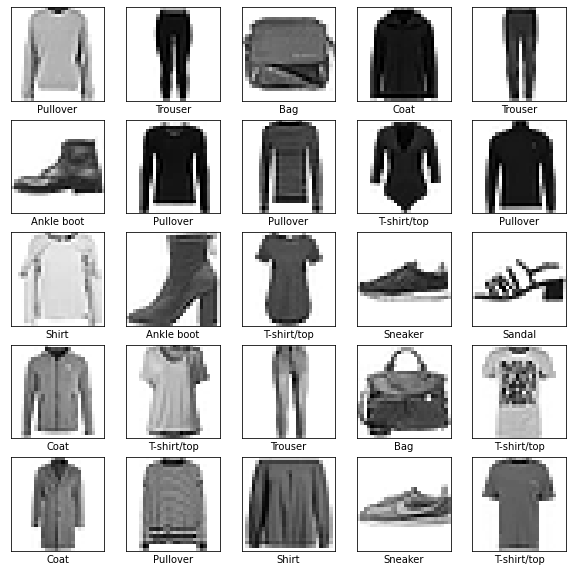

In [7]:
plt.figure(figsize = (10, 10))
for i, (image, label) in enumerate(train_dataset.take(25)):
  image = image.numpy().reshape((28, 28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap = plt.cm.binary)
  plt.xlabel(class_names[label])
plt.show()

**Building Model**

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [9]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

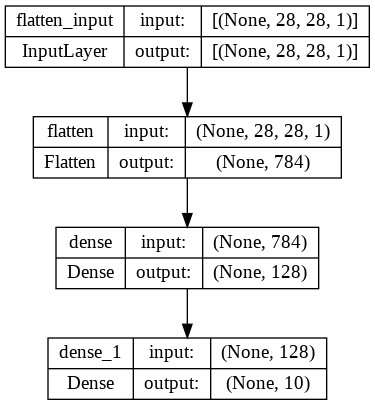

In [10]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

**Training model**

In [11]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [14]:
model.fit(train_dataset, epochs=15, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2475 - accuracy: 0.9070
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2424 - accuracy: 0.9099
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2300 - accuracy: 0.9133
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2258 - accuracy: 0.9156
Epoch 5/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2181 - accuracy: 0.9188
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2098 - accuracy: 0.9215
Epoch 7/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2056 - accuracy: 0.9225
Epoch 8/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1983 - accuracy: 0.9252
Epoch 9/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1947 - accuracy: 0.9262
Epoch 10/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.191

**Evaluation and Testing**

In [15]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3769 - accuracy: 0.8888
Accuracy on test dataset: 0.8888000249862671


In [41]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

1/1 [==============================] - 0s 15ms/step


In [42]:
np.argmax(predictions[0])

4

In [43]:
test_labels[0]

4

In [44]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

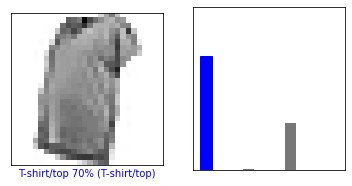

In [46]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

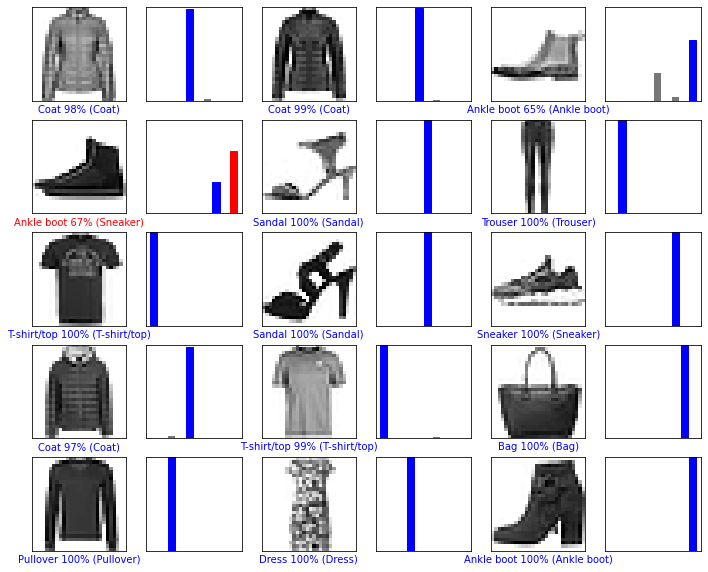

In [47]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
